In [1]:
using DataFrames
using Plots
using CSV
using Statistics


In [2]:
using DelimitedFiles

In [3]:
ccc_covid = DataFrame(CSV.File("ccc_covid.txt"))
ccc_przed = DataFrame(CSV.File("ccc_przed.txt"))
cd_proj_covid = DataFrame(CSV.File("cd_projekt_covid.txt"))
cd_proj_przed = DataFrame(CSV.File("cd_projekt_przed.txt"))
kghm_przed = DataFrame(CSV.File("kghm_przed.txt"))
kghm_covid = DataFrame(CSV.File("kghm_covid.txt"))
orlen_przed = DataFrame(CSV.File("pknorlen_przed.txt"))
orlen_covid = DataFrame(CSV.File("pknorlen_covid.txt"))
santander_covid = DataFrame(CSV.File("santander_covid.txt"))
santander_przed = DataFrame(CSV.File("santander_przed.txt"))

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
,Date…,Float64,Float64,Float64,Float64,Int64
1,2019-02-27,361.61,362.56,357.26,358.21,49397
2,2019-02-28,351.58,362.94,351.2,356.31,364276
3,2019-03-01,357.83,365.78,356.88,364.07,93493
4,2019-03-04,365.4,365.4,354.99,359.72,76407
5,2019-03-05,355.93,365.02,355.37,357.26,96738
6,2019-03-06,359.72,363.7,356.31,360.67,45650
7,2019-03-07,361.99,364.45,358.77,362.18,29844
8,2019-03-08,359.53,360.86,353.09,353.47,61941
9,2019-03-11,355.55,356.31,349.69,349.87,82228


In [4]:
zloto_przed = DataFrame(CSV.File("ZLOTO_PRZED.txt"))
zloto_covid = DataFrame(CSV.File("ZLOTO_COVID.txt"))
dni = readdlm("only_dates.txt")
zarazenia_w_dni_GPW = DataFrame(CSV.File("zarazeni_w_dni_GPW.txt"))

,Dzien,lacznie,dzienny_przyrost
,Date…,Int64,Int64
1,2020-03-04,1,1
2,2020-03-05,1,0
3,2020-03-06,5,4
4,2020-03-09,17,6
5,2020-03-10,22,5
6,2020-03-11,31,9
7,2020-03-12,51,20
8,2020-03-13,68,17
9,2020-03-16,177,52


In [5]:
function srednia_kroczaca(dane::Array, kolumna::Int64, zakres_sredniej::Int64)
    dane2 = Vector{Any}(undef, size(dane)[1])
    dane2 = dane[1:size(dane)[1], kolumna]
    for i in 2+zakres_sredniej:size(dane)[1]-zakres_sredniej
        suma = sum(dane[i-zakres_sredniej:i+zakres_sredniej, kolumna])
        dane2[i] = suma/(2*zakres_sredniej + 1)
    end
    return dane2[zakres_sredniej:size(dane)[1]-zakres_sredniej]
end

srednia_kroczaca (generic function with 1 method)

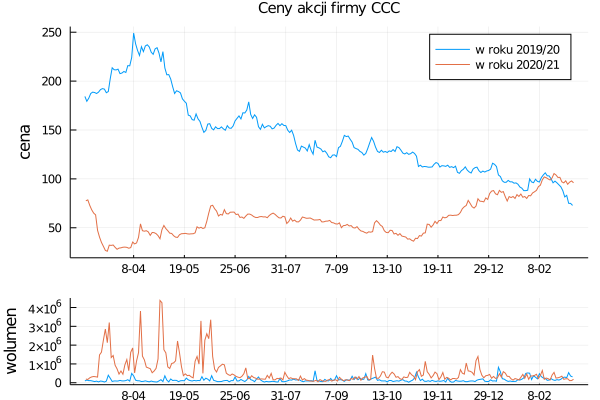

In [39]:
otwarcie_przed = plot(dni[1:end], ccc_przed[1:end, 2], 
    title="Ceny akcji firmy CCC", 
    ylabel="cena",
    label = "w roku 2019/20",
    legend=:best, 
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
otwarcie = plot!(ccc_covid[1:end, 2], label = "w roku 2020/21")

wolumen_przed = plot(dni[1:end], ccc_przed[1:end, 6], 
    xlabel = "data", 
    ylabel="wolumen",
    legend=false,
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
wolumen = plot!(ccc_covid[1:end, 6])

plot(otwarcie, wolumen, layout=grid(2,1, heights=[0.8,0.3]))

In [7]:
std(ccc_przed[1:end, 2]; corrected = false)

40.14278547045013

In [8]:
std(ccc_covid[1:end, 2]; corrected = false)

18.20488207504154

In [9]:
sum(ccc_covid[1:end, 6] - ccc_przed[1:end, 6])

111617500

In [10]:
cor(zarazenia_w_dni_GPW[1:end, 3], ccc_covid[1:end, 2])

0.20467422717516062

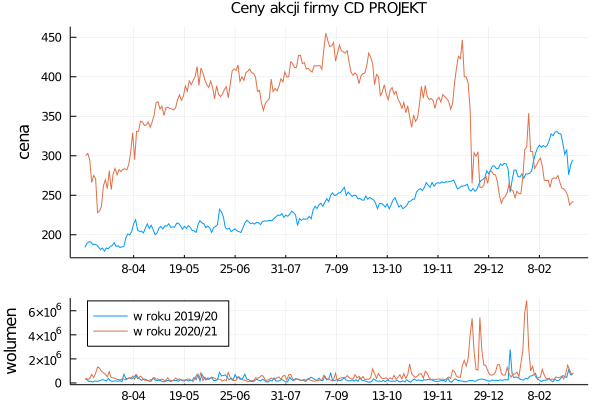

In [40]:
otwarcie_przed = plot(dni[1:end], cd_proj_przed[1:end, 2], 
    title="Ceny akcji firmy CD PROJEKT",
    ylabel="cena",
    legend=false,
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
otwarcie = plot!(cd_proj_covid[1:end, 2])

wolumen_przed = plot(dni[1:end], cd_proj_przed[1:end, 6],
    xlabel = "data", 
    ylabel="wolumen",
    label = "w roku 2019/20",
    legend=:topleft, 
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
wolumen = plot!(cd_proj_covid[1:end, 6], label = "w roku 2020/21")

plot(otwarcie, wolumen, layout=grid(2,1, heights=[0.8,0.3]))

In [12]:
std(cd_proj_przed[1:end, 2]; corrected = false)

35.17766892513618

In [13]:
std(cd_proj_covid[1:end, 2]; corrected = false)

59.572434344512146

In [14]:
sum(cd_proj_covid[1:end, 6] - cd_proj_przed[1:end, 6])

91143250

In [15]:
cor(zarazenia_w_dni_GPW[1:end, 3], cd_proj_covid[1:end, 2])

-0.18968193309340411

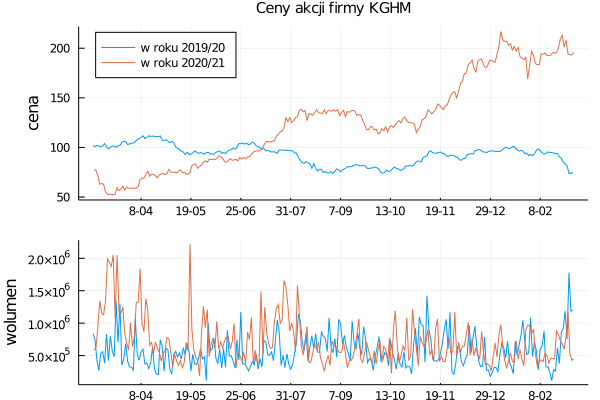

In [41]:
otwarcie_przed = plot(dni[1:end], kghm_przed[1:end, 2], 
    title="Ceny akcji firmy KGHM",  
    ylabel="cena",
    label = "w roku 2019/20", 
    legend=:topleft,
    titlefont=font(10),
    legendfont=font(8),
    xtickfont=font(8), 
    ytickfont=font(8))
otwarcie = plot!(kghm_covid[1:end, 2], label = "w roku 2020/21")

wolumen_przed = plot(dni[1:end], kghm_przed[1:end, 6], 
    xlabel = "data", 
    ylabel="wolumen", 
    legend=false,
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
wolumen = plot!(kghm_covid[1:end, 6])

plot(otwarcie, wolumen, layout=grid(2,1, heights=[0.6,0.5]))

In [42]:
std(kghm_przed[1:end, 2]; corrected = false)

9.723155481214155

In [18]:
std(kghm_covid[1:end, 2]; corrected = false)

45.26171372634453

In [19]:
sum(kghm_covid[1:end, 6] - kghm_przed[1:end, 6])

36342619

In [20]:
cor(zarazenia_w_dni_GPW[1:end, 3], kghm_covid[1:end, 2])

0.5077816499261145

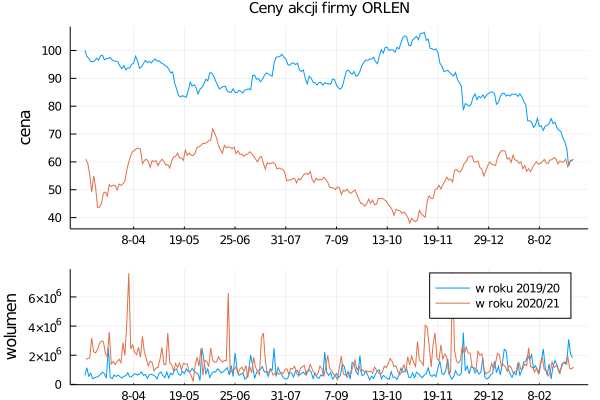

In [43]:
otwarcie_przed = plot(dni[1:end], orlen_przed[1:end, 2], 
    title="Ceny akcji firmy ORLEN",
    ylabel="cena",
    legend=false,
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
otwarcie = plot!(orlen_covid[1:end, 2])

wolumen_przed = plot(dni[1:end], orlen_przed[1:end, 6],  
    xlabel = "data", 
    ylabel="wolumen",
    label = "w roku 2019/20", 
    legend=:topright,
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
wolumen = plot!(orlen_covid[1:end, 6], label = "w roku 2020/21")

plot(otwarcie, wolumen, layout=grid(2,1, heights=[0.7,0.4]))

In [22]:
std(orlen_przed[1:end, 2]; corrected = false)

8.759952635477358

In [23]:
std(orlen_covid[1:end, 2]; corrected = false)

7.259530262336789

In [24]:
sum(orlen_covid[1:end, 6] - orlen_przed[1:end, 6])

155026186

In [25]:
cor(zarazenia_w_dni_GPW[1:end, 3], orlen_covid[1:end, 2])

-0.36834745048443757

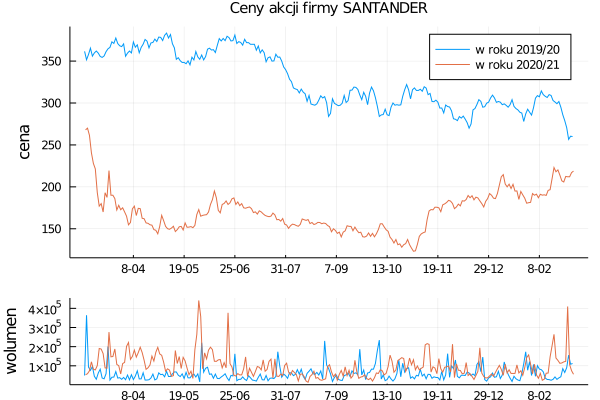

In [44]:
otwarcie_przed = plot(dni[1:end], santander_przed[1:end, 2], 
    title="Ceny akcji firmy SANTANDER",
    ylabel="cena",
    label = "w roku 2019/20", 
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
otwarcie = plot!(santander_covid[1:end, 2], label = "w roku 2020/21")

wolumen_przed = plot(dni[1:end], santander_przed[1:end, 6],
    xlabel = "data", 
    ylabel="wolumen",
    legend=:false,
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))
wolumen = plot!(santander_covid[1:end, 6])

plot(otwarcie, wolumen, layout=grid(2,1, heights=[0.8,0.3]))

In [27]:
std(santander_przed[1:end, 2]; corrected = false)

33.75789834128641

In [28]:
std(santander_covid[1:end, 2]; corrected = false)

24.45177426312551

In [29]:
sum(santander_covid[1:end, 6] - santander_przed[1:end, 6])

9621982

In [30]:
cor(zarazenia_w_dni_GPW[1:end, 3], santander_covid[1:end, 2])

0.04146645600279658

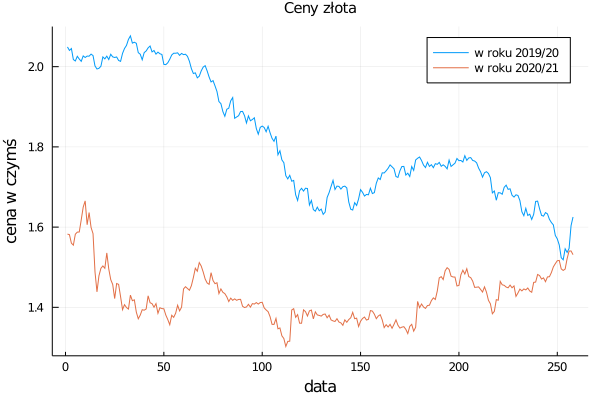

In [31]:
otwarcie = plot(zloto_przed[1:end, 2], 
    title="Ceny złota", 
    ylabel="cena w czymś",
    label = "w roku 2019/20",
    legend=:best, 
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))

Wiki = plot!(zloto_covid[1:end, 2], 
    xlabel = "data",
    label = "w roku 2020/21",
    titlefont=font(10),
    xtickfont=font(8), 
    ytickfont=font(8))

In [32]:
symulacja - Adam P

LoadError: syntax: extra token "P" after end of expression